In [40]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches  as mpatches
import seaborn as sns
sns.set()

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


In [2]:
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catalogs.generation.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.measures.instance import InstanceCatalog
from lsst.sims.utils import ObservationMetaData

Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values


In [4]:
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj, GalaxyDiskObj
from lsst.sims.catUtils.baseCatalogModels import SNObj
from lsst.sims.catUtils.mixins import FrozenSNCat

In [5]:
s  = SNObj()

## ObsMetaData

In [6]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

In [7]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [8]:
opsimPath = os.path.join('/Users/rbiswas/data/LSST/OpSimData')
opsimDB = os.path.join(opsimPath,'enigma_1189_sqlite.db')

In [9]:
generator = ObservationMetaDataGenerator(driver='sqlite', database=opsimDB) #database = opsimPath, driver='sqlite')
obsMetaDataResults = generator.getObservationMetaData(limit=100,
                                                      fieldRA=(centralRA - 2.0, centralRA + 2.0), 
                                                      fieldDec=(centralDec - 2.0, centralDec + 2.0),
                                                      expMJD=(49500., 49690.),
                                                      boundLength=0.05,
                                                      boundType='circle')

In [10]:
TwinklesObsMetaDataSmall = obsMetaDataResults[35]

In [11]:
TwinklesObsMetaDataSmall.pointingRA

53.009138473031555

In [12]:
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}

In [13]:
Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)
Ttsmall.write_catalog('TTwinklesSN.dat')

In [14]:
TTSNdf = pd.read_csv('TTwinklesSN.dat', sep=',\s+')

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


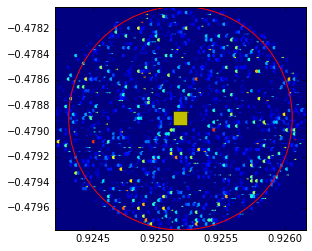

In [15]:
fig, ax = plt.subplots()
ax.hexbin(TTSNdf['#raJ2000'], TTSNdf.decJ2000)
ax.plot(np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec), 
         'ys', markersize=14)
circ = mpatches.Circle((np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec)), 
         np.radians(0.05))
circ.set(edgecolor='r', fill=False)
#circ.set(face)
ax.add_artist(circ)
ax.set_aspect('equal')

##  SN Instance Catalogs

In [16]:
sncatalog = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0', 'flux', 'flux_err', 'mag', 'mag_err',
                                         'TmagNorm', 'TsedFilepath', 'adu'])
sncatalog.surveyStartDate = 49500.
sncatalog.writeSedFile = False
sncatalog.prefix = '/Users/rbiswas/tmp/'

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [17]:
sncatalog.suppressDimSN = True

In [18]:
_ = sncatalog.write_catalog('newcat.dat', chunk_size=2000)

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1879)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1876)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1897)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 675)


In [19]:
!wc -l newcat.dat

     393 newcat.dat


##  PhoSim Catalogs

In [20]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN, PhoSimCatalogSersic2D

In [21]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, column_outputs=['EBV'])
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('Type of return', <type 'numpy.ndarray'>, dtype('O'))
()


In [22]:
pc.write_catalog('SNOnlyPhoSimCatalog.dat')

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('Type of return', <type 'numpy.ndarray'>, dtype('O'))
()
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 6327)
('writing file to ', 'specFile_6000274614100_49612.3383_r.dat')
('writing file to ', 'specFile_6000606050501_49612.3383_r.dat')
('writing file to ', 'specFile_6000018451007_49612.3383_r.dat')
('writing file to ', 'specFile_6000091709107_49612.3383_r.dat')
('writing file to ', 'specFile_6000777478400_49612.3383_r.dat')
('writing file to ', 'specFile_6000972229700_49612.3383_r.dat')
('writing file to ', 'specFile_6000167058301_49612.3383_r.dat')
('writing file to ', 'specFile_6000307465100_49612.3383_r.dat')
('writing file to ', 'specFile_6000140140803_49612.3383_r.dat')
('writing file to ', 'specFile_6000835291202_49612.3383_r.dat')
('writing file to ', 'specFile_6000927114101_49612.3383_r.dat')
('writing file to ', 'specFile_6000676754304_49612.

In [25]:
sncatdf = pd.read_csv('newcat.dat', sep=',\s+')
sncatdf.rename(columns={'#snid':'snid'}, inplace=True)
sncatdf['snid'] = sncatdf.snid.astype(int)
sncatdf.set_index('snid', inplace=True)
sncatdf['DeltaT'] = sncatalog.mjdobs - sncatdf['t0']
sncatdf['SNR'] = sncatdf.flux / sncatdf.flux_err
sncatdf.head()

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,snra,sndec,z,t0,c,x1,x0,galtileid,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR
snid,,,,,,,,,,,,,,,,,
6000274614100,0.924854,-0.479609,0.8928,49548.8777,0.033894,1.4029,0.000003,60002746141,6.241729e-12,3.596256e-11,28.011700,2.075135,27.0441,specFile_6000274614100_49612.3383_r.dat,18.0798,63.460596,0.173562
6000606050501,0.924858,-0.479617,0.6129,49649.3653,0.101883,0.6835,0.000005,60006060505,0.000000e+00,NaN,inf,inf,50.2928,specFile_6000606050501_49612.3383_r.dat,0.0000,-37.027004,NaN
6000018451007,0.924901,-0.479572,0.0792,49663.7526,0.102872,-0.0847,0.000481,60000184510,0.000000e+00,NaN,inf,inf,45.9639,specFile_6000018451007_49612.3383_r.dat,0.0000,-51.414304,NaN
6000091709107,0.924818,-0.479540,0.8797,49571.7622,0.122812,0.3551,0.000002,60000917091,6.625628e-12,3.596336e-11,27.946900,2.020182,27.2687,specFile_6000091709107_49612.3383_r.dat,19.1918,40.576096,0.184233
6000777478400,0.924802,-0.479560,0.5110,49661.1437,-0.095341,2.4452,0.000019,60007774784,0.000000e+00,NaN,inf,inf,48.3956,specFile_6000777478400_49612.3383_r.dat,0.0000,-48.805404,NaN


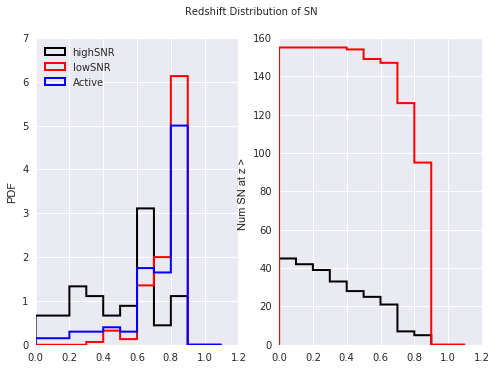

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(sncatdf.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[1].set_ylabel('Num SN at z > ')
_ = fig.suptitle('Redshift Distribution of SN')

##  PhoSim Catalog For galaxy Disks

In [ ]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN, PhoSimCatalogSersic2D

In [ ]:
from lsst.sims.catUtils.baseCatalogModels import GalaxyDiskObj

In [ ]:
gDisk = GalaxyDiskObj()

In [ ]:
gDisk.objectTypeId

In [ ]:
class GdiscCatalogClass(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'galtileid', 'id', 'redshift']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}

In [ ]:

gd = GdiscCatalogClass(db_obj=gDisk, obs_metadata=TwinklesObsMetaDataSmall)
gd.write_catalog('GalaxyDisks.dat')

In [ ]:
phosimGals = PhoSimCatalogSersic2D(db_obj=gDisk, obs_metadata=TwinklesObsMetaDataSmall)

In [ ]:
phosimGals.write_catalog('GalDiskPhoSimCatalog.dat')
phosimGals.write_catalog('SNPhoSimCatalog.dat', write_header=False, write_mode='a')

## Keeping only hosts

In [ ]:
galD = pd.read_csv('GalaxyDisks.dat', sep=',\s+');
galD.rename(columns={'#raJ2000': 'raJ2000'}, inplace=True)
galD.head()

In [ ]:
gg = galD.galtileid.copy(deep=True)
gg.sort(inplace=True)
sng = df.galtileid.copy(deep=True)
sng.sort(inplace=True)

In [ ]:
sgg = set(gg.values); print (len(sgg))

In [ ]:
sngg = set(sng.values); print(len(sngg))

In [ ]:
galdiskids = np.left_shift(np.array(list(sgg.intersection(set(sng.values)))), 10) + 27

In [ ]:
len(sng.values)

In [ ]:
gals = pd.read_csv('SNGalDiskCatalog.dat', sep='\s*', skiprows=410).values

In [ ]:
gdiskids = np.left_shift(df.galtileid, 10).values + 27

In [ ]:
gdiskids

In [ ]:
with open('SNGalDiskCatalog.dat') as f:
    contents = f.read()

lines = contents.split('\n')
lines.pop()
# print len(contents)
with open('SNHostFile.dat', 'w') as f:
    for i, line in enumerate(lines):
        if i < 410:
            # print line
            f.write(line+'\n')
        else:
            objint = int(line.split()[1])
            # print i, int(line.split()[1])
            if objint in galdiskids:
                f.write(line+'\n')

In [ ]:
with open('SNGalDiskCatalog.dat') as f:
    contents = f.read()

In [ ]:
contents.split('\n').pop()

In [ ]:
contents.split('\n').pop()

In [ ]:
gals[:, 1].astype(np.int).sort()

In [ ]:
61449608101915 in gals[:, 1]

In [ ]:
galdiskids

In [ ]:
np.left_shift(np.array(list(sgg.intersection(set(sng.values)))), 10) + 27

In [ ]:
SNgaltileIds = df.galtileid

In [ ]:
np.left_shift(SNgaltileIds, 10) + gdiskobjid

In [ ]:
len(phosimGals.column_outputs)

In [ ]:
len(pc.column_outputs)

In [ ]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, column_outputs=['EBV'])
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

In [ ]:
from copy import deepcopy

In [ ]:
len(pc.column_outputs)

In [ ]:
for col in phosimGals.column_outputs:
    if not col in pc.column_outputs:
        print col

In [ ]:
pc.write_catalog('SNPhoSimCatalog.dat')

In [ ]:
np.array([3.2, 1.2]) *1.2

In [ ]:
0.1/11.113

In [ ]:
!wc -l SNPhoSimCatalog.dat

In [ ]:
!head -22 SNPhoSimCatalog.dat

In [ ]:
phdf = pd.read_csv('SNPhoSimCatalog.dat', skiprows=18, sep='\s*')

In [ ]:
phdf.rename(columns={})

In [ ]:
phdf.head()

In [ ]:
plt.hist(np.asarray(phdf)[:,1], log=True)

In [ ]:
def phosimOutDF(fname0, fname1):
    
    phosimOut0 = pd.read_csv(fname0, sep='\s+')
    phosimOut1 = pd.read_csv(fname1, sep='\s+')
    phosimOut0.Photons += phosimOut1.Photons
    phosimOut0.

In [29]:
phosimOuta = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E000.txt', 
                         sep='\s+')

In [30]:
phosimOutb = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E001.txt', sep='\s+')

In [31]:
phosimOuta.Photons = phosimOuta.Photons + phosimOutb.Photons

In [32]:
phosimOuta['SourceID'] = phosimOuta.SourceID.astype(int)

In [33]:
phosimOuta['snid'] = np.right_shift(phosimOuta['SourceID'], 10)

In [34]:
phosimOuta.set_index('snid', inplace=True)

In [36]:
sncatdf.adu.min()

-31.282399999999999

In [37]:
sncatdf['ratio'] = sncatdf.adu / phosimOuta.Photons

In [38]:
sncatdf['Photons'] = phosimOuta.Photons

In [ ]:
sncatdf.query('ratio == 0.')

In [43]:
from scipy.stats import poisson

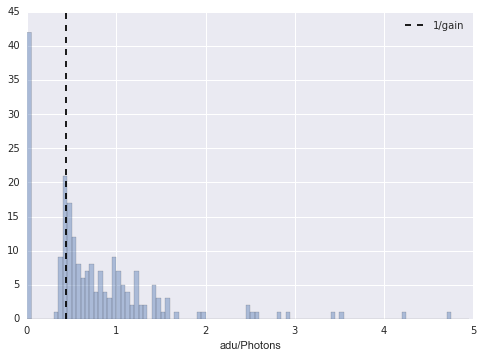

In [42]:
fig, ax = plt.subplots()
sns.distplot(sncatdf.ratio.replace([-np.inf, np.inf],np.nan).dropna(), bins=np.arange(0.0, 5., 0.05), 
             rug_kws=False,kde=False, norm_hist=False).set_xlim(0,)
sns.distributions()
#ax.hist(df.ratio.replace([-np.inf, np.inf],np.nan).dropna() ,bins=np.arange(0., 5, 0.05))
ax.axvline(1./2.3, color='k', **{'label':'1/gain', 'linestyle':'dashed'})
ax.set_xlabel('adu/Photons')
ax.legend(loc='best')

In [50]:
rv = poisson(mu=1)

In [51]:
x = np.arange(0, 10)

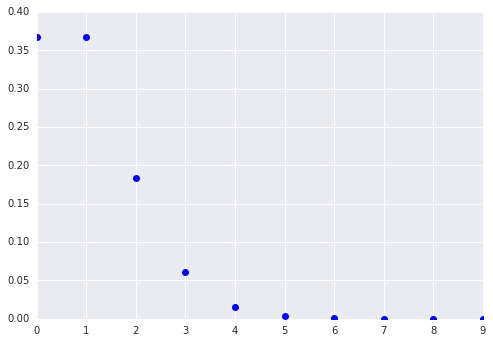

In [55]:
plt.plot(x, rv.pmf(x), 'bo')

In [52]:
plt.hist(sncatdf.Photons / sncatdf.adu / 2.3, np.arange(-0.5,5.5), histtype='step')
plt.plot()

SyntaxError: invalid syntax (<ipython-input-52-7080adb9fa8c>, line 1)

In [ ]:
plt.plot(poisson.pmf)

In [ ]:
df.query('ratio > 1000.')[['adu', 'Photons', 'flux', 'DeltaT', 'mag', 'mag_err', 'flux_err']]

In [ ]:
x = df.query('ratio ==0.').Photons.copy(deep=True)

In [ ]:
x.sort(ascending=False); x

In [ ]:
fig.savefig('invGain.png')

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
print len(df.query('ratio > 10000')), df.query('ratio > 10000').ratio.unique()
print len(df.query('ratio < -10000')), df.query('ratio < -10000').ratio.unique()

In [ ]:
df.query('ratio >500.').adu 

In [ ]:
_df = df.query('ratio == 0.')
_dff = df.query('ratio < 0.')
_ = plt.hist(_df.DeltaT / (_df.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='b', alpha=1., lw=2.)
_ = plt.hist(_dff.DeltaT / (_dff.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='r', alpha=1., lw=2.)
plt.axvline(-20., color='k')
plt.axvline(50., color='k')

In [ ]:
_df = df[['z', 'ratio']].replace([-np.inf, np.inf], [-20., 200.]).dropna()
#sns.jointplot(_df.z, _df.ratio, kind='kde')
plt.plot(_df.z, _df.ratio, 'o')

In [ ]:
adus = df.adu.dropna().sum()
photons = phosimOuta.replace([np.inf],np.nan).Photons.dropna().sum()

In [ ]:
photons / adus

In [ ]:
active = df.query('SNR > 0.').replace([np.inf],np.nan).dropna().ratio
bright = df.query('SNR > 5.').replace([np.inf],np.nan).dropna().ratio

In [ ]:
s = 0.05
plt.hist(active, color='r', bins=np.arange(0., 25, s), histtype='step', label='SNR>0', lw=2)
plt.hist(bright, color='k', bins=np.arange(0., 25, s), histtype='step', label='SNR>5', lw=2)
plt.legend(loc='best')
plt.axvline(1./2.3)
plt.xlim(0, 5)

In [ ]:
import lsst.afw.image as afwi

In [ ]:
img0 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E000.fits.gz')
img1 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E001.fits.gz')

In [ ]:
arr0 = img0.getArray()
arr1 = img1.getArray()

In [ ]:
arr = arr0 + arr1
electrons = arr.sum()

In [ ]:
adus  = df.adu.dropna().sum()

In [ ]:
2.3 / np.sqrt(2)

In [ ]:
electrons / adus

In [ ]:
x.replace([-np.inf, np.inf], np.nan, inplace=True)

In [ ]:
x.dropna().hist()

In [ ]:
df.set_index('snid', inplace=True)

In [ ]:
x.dropna()

In [ ]:
df.index.size

In [ ]:
phosimOuta.index.dtype

In [ ]:
6145532174336041 in df.index.values

In [ ]:
df.iat[6145532174336041]

In [ ]:
phosimOuta['snid']  = phosimOuta.index.values

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['snid'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
phosimOuta['adu']/ phosimOuta['Photons']

In [ ]:
phosimOuta.head()

In [ ]:
df.index.min()

In [ ]:
phosimOuta.index.min()

In [ ]:
np.left_shift(6000000189404,10) < phosimOuta.index.min()

In [ ]:
np.right_shift(np.left_shift(6000000189404,10),10)

In [ ]:
id(None)

In [ ]:
x  = None

In [ ]:
id(x)

In [ ]:
y = None

In [ ]:
xx =3

In [ ]:
yy  = 3

In [ ]:
 == y

In [ ]:
x is y

In [ ]:
id(xx)

In [ ]:
id(yy)

# Scratch

In [ ]:
names = s.get_column_names()

for key in names:
    if 'snra' in names[key]:
        print key

print names['TwinkSN']

In [ ]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
